In [1]:
import numpy as np
import torch
import torchvision

Load data from the Fashion MNIST dataset

In [2]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

a. Load the dataset and display 10 representative images from each of the 10 classes.

In [3]:
#Data Loader
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=64, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=False)

<function matplotlib.pyplot.show(close=None, block=None)>

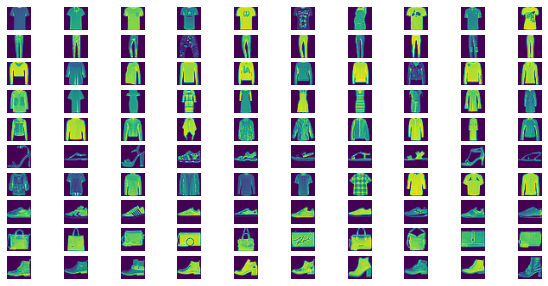

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

displayDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=600, shuffle=True)
dataiter = iter(displayDataLoader)
images, labels = next(dataiter)

plt.figure(figsize=(10,5))
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(images[labels == i][j][0]) 
        plt.axis('off')
plt.show

b. Implement a simple 3-layer neural network classifier for this dataset. The input is 784 features and the output is 10 classes, so the network should have three sets of weighs: 784x200, 200x200, and 200x10. Use ReLU activations for the hidden neurons.

In [5]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = torch.nn.Linear(784, 200)
        self.linear2 = torch.nn.Linear(200, 200)
        self.linear3 = torch.nn.Linear(200, 10)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x


c. Train this network for 30 epochs and plot your train and test curves. Report best test accuracy performance by tuning hyperparameters: pick learning rates (0.1, 0.5), batch size (16,64).

Epoch [1/30], Step [100/938], Loss: 1.0359, Accuracy: 54.69%
Epoch [1/30], Step [200/938], Loss: 0.7684, Accuracy: 71.88%
Epoch [1/30], Step [300/938], Loss: 0.7760, Accuracy: 70.31%
Epoch [1/30], Step [400/938], Loss: 0.6042, Accuracy: 82.81%
Epoch [1/30], Step [500/938], Loss: 0.5111, Accuracy: 78.12%
Epoch [1/30], Step [600/938], Loss: 0.5734, Accuracy: 84.38%
Epoch [1/30], Step [700/938], Loss: 0.5891, Accuracy: 76.56%
Epoch [1/30], Step [800/938], Loss: 0.5725, Accuracy: 82.81%
Epoch [1/30], Step [900/938], Loss: 0.3151, Accuracy: 89.06%
Epoch [1/30], Step [100/157], Loss: 0.3702, Accuracy: 84.38%
Epoch [2/30], Step [100/938], Loss: 0.5752, Accuracy: 70.31%
Epoch [2/30], Step [200/938], Loss: 0.5985, Accuracy: 79.69%
Epoch [2/30], Step [300/938], Loss: 0.3006, Accuracy: 87.50%
Epoch [2/30], Step [400/938], Loss: 0.5096, Accuracy: 81.25%
Epoch [2/30], Step [500/938], Loss: 0.5059, Accuracy: 85.94%
Epoch [2/30], Step [600/938], Loss: 0.2651, Accuracy: 90.62%
Epoch [2/30], Step [700/

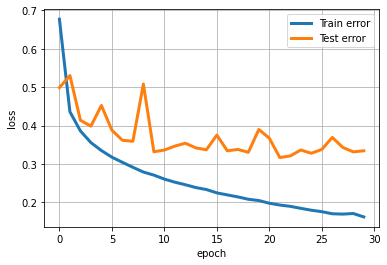

In [6]:
model = NeuralNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_loss_list = []
test_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(trainDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(trainDataLoader), loss.item(),
                            (correct / total) * 100))
    train_loss_list.append(total_loss / len(trainDataLoader))
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(testDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(testDataLoader), loss.item(),
                            (correct / total) * 100))
    test_loss_list.append(total_loss / len(testDataLoader))
    
plt.plot(range(num_epochs),train_loss_list,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_list,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Epoch [1/30], Step [100/938], Loss: 1.4030, Accuracy: 54.69%
Epoch [1/30], Step [200/938], Loss: 0.6406, Accuracy: 75.00%
Epoch [1/30], Step [300/938], Loss: 0.8137, Accuracy: 75.00%
Epoch [1/30], Step [400/938], Loss: 0.3779, Accuracy: 85.94%
Epoch [1/30], Step [500/938], Loss: 0.6600, Accuracy: 78.12%
Epoch [1/30], Step [600/938], Loss: 0.4617, Accuracy: 82.81%
Epoch [1/30], Step [700/938], Loss: 0.6517, Accuracy: 76.56%
Epoch [1/30], Step [800/938], Loss: 0.4357, Accuracy: 85.94%
Epoch [1/30], Step [900/938], Loss: 0.4913, Accuracy: 79.69%
Epoch [1/30], Step [100/157], Loss: 0.4246, Accuracy: 81.25%
Epoch [2/30], Step [100/938], Loss: 0.3150, Accuracy: 89.06%
Epoch [2/30], Step [200/938], Loss: 0.5325, Accuracy: 84.38%
Epoch [2/30], Step [300/938], Loss: 0.5778, Accuracy: 76.56%
Epoch [2/30], Step [400/938], Loss: 0.7890, Accuracy: 71.88%
Epoch [2/30], Step [500/938], Loss: 0.2883, Accuracy: 90.62%
Epoch [2/30], Step [600/938], Loss: 0.5600, Accuracy: 81.25%
Epoch [2/30], Step [700/

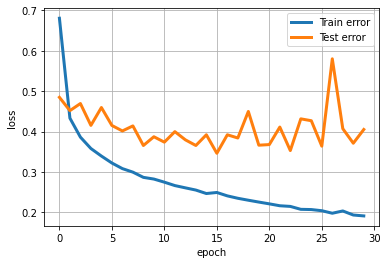

In [7]:
model = NeuralNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train_loss_list = []
test_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(trainDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(trainDataLoader), loss.item(),
                            (correct / total) * 100))
    train_loss_list.append(total_loss / len(trainDataLoader))
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(testDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(testDataLoader), loss.item(),
                            (correct / total) * 100))
    test_loss_list.append(total_loss / len(testDataLoader))
    
plt.plot(range(num_epochs),train_loss_list,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_list,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Epoch [1/30], Step [100/3750], Loss: 1.8379, Accuracy: 37.50%
Epoch [1/30], Step [200/3750], Loss: 1.0823, Accuracy: 56.25%
Epoch [1/30], Step [300/3750], Loss: 1.4198, Accuracy: 56.25%
Epoch [1/30], Step [400/3750], Loss: 0.7298, Accuracy: 75.00%
Epoch [1/30], Step [500/3750], Loss: 0.9560, Accuracy: 68.75%
Epoch [1/30], Step [600/3750], Loss: 0.5251, Accuracy: 81.25%
Epoch [1/30], Step [700/3750], Loss: 0.5917, Accuracy: 68.75%
Epoch [1/30], Step [800/3750], Loss: 0.4505, Accuracy: 87.50%
Epoch [1/30], Step [900/3750], Loss: 0.8252, Accuracy: 75.00%
Epoch [1/30], Step [1000/3750], Loss: 0.3624, Accuracy: 87.50%
Epoch [1/30], Step [1100/3750], Loss: 0.2545, Accuracy: 100.00%
Epoch [1/30], Step [1200/3750], Loss: 0.3774, Accuracy: 81.25%
Epoch [1/30], Step [1300/3750], Loss: 0.5244, Accuracy: 81.25%
Epoch [1/30], Step [1400/3750], Loss: 0.4932, Accuracy: 81.25%
Epoch [1/30], Step [1500/3750], Loss: 0.3434, Accuracy: 87.50%
Epoch [1/30], Step [1600/3750], Loss: 0.4372, Accuracy: 81.25%


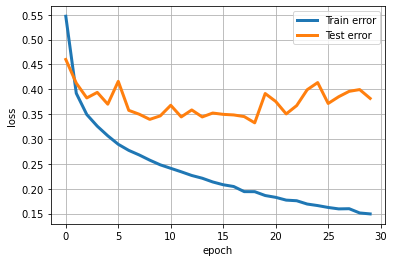

In [8]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=16, shuffle=False)
model = NeuralNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_loss_list = []
test_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(trainDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(trainDataLoader), loss.item(),
                            (correct / total) * 100))
    train_loss_list.append(total_loss / len(trainDataLoader))
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(testDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(testDataLoader), loss.item(),
                            (correct / total) * 100))
    test_loss_list.append(total_loss / len(testDataLoader))
    
plt.plot(range(num_epochs),train_loss_list,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_list,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

Epoch [1/30], Step [100/3750], Loss: 1.8869, Accuracy: 37.50%
Epoch [1/30], Step [200/3750], Loss: 2.0356, Accuracy: 12.50%
Epoch [1/30], Step [300/3750], Loss: 2.0150, Accuracy: 18.75%
Epoch [1/30], Step [400/3750], Loss: 1.9814, Accuracy: 12.50%
Epoch [1/30], Step [500/3750], Loss: 1.3679, Accuracy: 43.75%
Epoch [1/30], Step [600/3750], Loss: 2.0751, Accuracy: 12.50%
Epoch [1/30], Step [700/3750], Loss: 1.4309, Accuracy: 25.00%
Epoch [1/30], Step [800/3750], Loss: 1.7752, Accuracy: 37.50%
Epoch [1/30], Step [900/3750], Loss: 1.7654, Accuracy: 43.75%
Epoch [1/30], Step [1000/3750], Loss: 1.1073, Accuracy: 62.50%
Epoch [1/30], Step [1100/3750], Loss: 1.2893, Accuracy: 37.50%
Epoch [1/30], Step [1200/3750], Loss: 1.5494, Accuracy: 43.75%
Epoch [1/30], Step [1300/3750], Loss: 1.0588, Accuracy: 56.25%
Epoch [1/30], Step [1400/3750], Loss: 1.3314, Accuracy: 37.50%
Epoch [1/30], Step [1500/3750], Loss: 1.0837, Accuracy: 37.50%
Epoch [1/30], Step [1600/3750], Loss: 0.9564, Accuracy: 56.25%
E

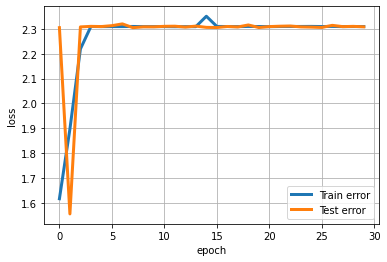

In [9]:
model = NeuralNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train_loss_list = []
test_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(trainDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(trainDataLoader), loss.item(),
                            (correct / total) * 100))
    train_loss_list.append(total_loss / len(trainDataLoader))
    total_loss = 0
    total_acc = 0
    for i, (images, labels) in enumerate(testDataLoader):
        # Run the forward pass
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        total_acc += correct / total
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                    .format(epoch+1, num_epochs, i+1, len(testDataLoader), loss.item(),
                            (correct / total) * 100))
    test_loss_list.append(total_loss / len(testDataLoader))
    
plt.plot(range(num_epochs),train_loss_list,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_list,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()